In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 03 - Keypoints analyseren en verrijken
De gedetecteerde keypoints zullen ten eerste geanalyseerd worden: zijn er verbanden te vinden tussen de keypoints en poses?
Daarnaast zal de data verrijkt worden met bijvoorbeeld verhoudingen en afstanden tussen bepaalde keypoints, denk aan afstanden tussen keypoints.

#### Toelichting data
Elke pose bevat 17 coördinaten. De betekenis van elke 'keypoint' is als volgt:
- 0: nose
- 1: left_eye
- 2: right_eye
- 3: left_ear
- 4: right_ear
- 5: left_shoulder
- 6: right_shoulder
- 7: left_elbow
- 8: right_elbow
- 9: left_wrist
- 10: right_wrist
- 11: left_hip
- 12: right_hip
- 13: left_knee
- 14: right_knee
- 15: left_ankle
- 16: right_ankle

De poses zijn als volgt genummerd:
- 0: chin_up
- 1: crossed_arms
- 2: delivered_gestures
- 3: giving_the_back
- 4: hands_behind_back
- 5: hands_in_pockets
- 6: hands_loose
- 7: hands_touching_face
- 8: crossing_legs
- 9: feet_neutral
- 10: feet_not_neutral
- 11: bodyweight_one_leg

In [21]:
keypoints_train_df_1 = pd.read_csv('analytics_df_train_YOLOv8m_1.csv', index_col=0, header=0)
keypoints_train_df_2 = pd.read_csv('analytics_df_train_YOLOv8m_2.csv', index_col=0, header=0)
keypoints_train_df = pd.concat([keypoints_train_df_1, keypoints_train_df_2])
#keypoints_train_df = pd.read_csv('analytics_df_train_YOLOv8n.csv', index_col=0, header=0)
keypoints_train_df.head()

path     pose  pose_code  \
0  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
1  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
2  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
3  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
4  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   

   confidence    x_nose    y_nose  x_left_eye  y_left_eye  x_right_eye  \
0    0.921941  0.509755  0.304004    0.521733    0.293620     0.497498   
1    0.922079  0.469513  0.314155    0.482124    0.303960     0.463963   
2    0.926764  0.571455  0.312802    0.573897    0.304598     0.561053   
3    0.925108  0.517389  0.333199    0.526162    0.321924     0.503669   
4    0.919342  0.490436  0.380321    0.502792    0.370140     0.477945   

   y_right_eye  ...  c_left_elbow  c_right_elbow  c_left_wrist  c_right_wrist  \
0     0.294270  ...      0.993641       0.989567      0.986935       0.981699   
1     0.304375  ...      0.997667       0.987880      0.994729       0.981342   
2     0.303390  ...      0.981343       0.991896      0.969353       0.984183   
3     0.323532  ...      0.993623       0.989700      0.987426       0.983029   
4     0.371312  ...      0.991748       0.989564      0.983808       0.980658   

   c_left_hip  c_right_hip  c_left_knee  c_right_knee  c_left_ankle  \
0    0.999623     0.999614     0.998593      0.998608      0.989318   
1    0.999766     0.999680     0.998908      0.998586      0.989669   
2    0.999641     0.999742     0.999135      0.999366      0.994589   
3    0.999671     0.999646     0.998908      0.998819      0.991403   
4    0.999669     0.999691     0.999019      0.999120      0.992922   

   c_right_ankle  
0       0.989279  
1       0.988196  
2       0.995360  
3       0.990388  
4       0.993421  

[5 rows x 55 columns]

In [22]:
keypoints_train_df.describe()

pose_code   confidence       x_nose       y_nose   x_left_eye  \
count  1209.000000  1209.000000  1209.000000  1209.000000  1209.000000   
mean      4.987593     0.920651     0.499728     0.302511     0.510906   
std       3.224083     0.018960     0.052254     0.075819     0.052345   
min       0.000000     0.552591     0.228431     0.000000     0.248554   
25%       2.000000     0.914146     0.467500     0.258531     0.478940   
50%       5.000000     0.922404     0.499716     0.307278     0.510186   
75%       7.000000     0.929813     0.531881     0.361559     0.542993   
max      11.000000     0.954017     0.770860     0.513572     0.782492   

        y_left_eye  x_right_eye  y_right_eye   x_left_ear   y_left_ear  ...  \
count  1209.000000  1209.000000  1209.000000  1209.000000  1209.000000  ...   
mean      0.291539     0.488518     0.291541     0.526923     0.298803  ...   
std       0.076560     0.052341     0.076578     0.053750     0.075006  ...   
min       0.000000     0.217196     0.000000     0.296581     0.000000  ...   
25%       0.245801     0.456309     0.245649     0.495626     0.254020  ...   
50%       0.295569     0.489205     0.295446     0.525461     0.303034  ...   
75%       0.351287     0.520418     0.350745     0.558145     0.356880  ...   
max       0.495704     0.750705     0.495460     0.781406     0.516769  ...   

       c_left_elbow  c_right_elbow  c_left_wrist  c_right_wrist   c_left_hip  \
count   1209.000000    1209.000000   1209.000000    1209.000000  1209.000000   
mean       0.962742       0.968940      0.943108       0.949484     0.997981   
std        0.092743       0.073709      0.109377       0.094080     0.009523   
min        0.184518       0.125627      0.147273       0.171132     0.806448   
25%        0.973583       0.977418      0.952229       0.959174     0.998648   
50%        0.987387       0.988230      0.975212       0.978114     0.999403   
75%        0.993413       0.992193      0.986310       0.984719     0.999686   
max        0.999289       0.996917      0.998674       0.992668     0.999934   

       c_right_hip  c_left_knee  c_right_knee  c_left_ankle  c_right_ankle  
count  1209.000000  1209.000000   1209.000000   1209.000000    1209.000000  
mean      0.997978     0.988599      0.988022      0.959719       0.958731  
std       0.010925     0.070133      0.072502      0.118911       0.126030  
min       0.768120     0.024024      0.014476      0.000782       0.000482  
25%       0.998771     0.996479      0.996959      0.980125       0.981606  
50%       0.999466     0.998146      0.998418      0.988317       0.989300  
75%       0.999726     0.998958      0.999130      0.992615       0.993412  
max       0.999918     0.999742      0.999748      0.998277       0.998923  

[8 rows x 53 columns]

In [24]:
keypoints_train_df['pose'].value_counts()

pose
delivered_gestures       240
hands_face               156
hands_in_pockets         140
crossed_arms             104
bodyweight               104
crossing_legs            102
hands_behind_the_back     96
hands_loose               77
giving_the_back           66
chin_up                   58
feet_not_neutral          56
feet_neutral              10
Name: count, dtype: int64

#### Stap 1. Keypoints analyseren

Eerst een visualisatie van de keypoints.

In [25]:
x_coordinates_cols = ['x_nose','x_left_eye','x_right_eye','x_left_ear','x_right_ear','x_left_shoulder','x_right_shoulder','x_left_elbow', 'x_right_elbow','x_left_wrist', 'x_right_wrist','x_left_hip','x_right_hip','x_left_knee','x_right_knee','x_left_ankle','x_right_ankle']

y_coordinates_cols = ['y_nose','y_left_eye','y_right_eye','y_left_ear','y_right_ear','y_left_shoulder','y_right_shoulder','y_left_elbow','y_right_elbow','y_left_wrist','y_right_wrist','y_left_hip','y_right_hip','y_left_knee','y_right_knee','y_left_ankle','y_right_ankle']

conf_coordinates_cols = ['c_nose','c_left_eye','c_right_eye','c_left_ear','c_right_ear','c_left_shoulder','c_right_shoulder','c_left_elbow','c_right_elbow','c_left_wrist','c_right_wrist','c_left_hip','c_right_hip','c_left_knee','c_right_knee','c_left_ankle','c_right_ankle']

poses_dict = {0: 'chin_up',
             1: 'crossed_arms',
             2: 'delivered_gestures',
             3: 'giving_the_back',
             4: 'hands_behind_back',
             5: 'hands_in_pockets',
             6: 'hands_loose',
             7: 'hands_touching_face',
             8: 'crossing_legs',
             9: 'feet_neutral',
             10: 'feet_not_neutral',
             11: 'bodyweight_one_leg'}

poses_array = ['chin_up', 'crossed_arms','delivered_gestures','giving_the_back','hands_behind_back','hands_in_pockets','hands_loose','hands_touching_face','crossing_legs','feet_neutral','feet_not_neutral','bodyweight_one_leg']

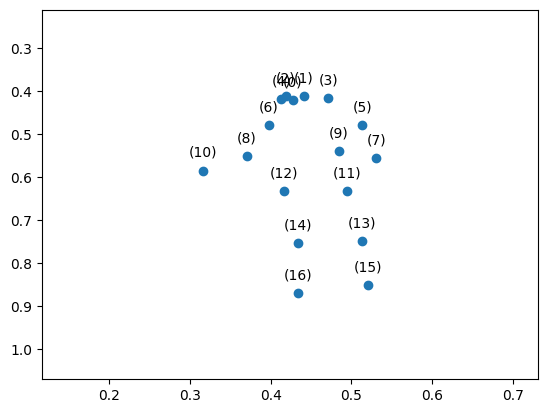

In [26]:
# Visualisatie van de keypoints van een willekeurig plaatje
row = 200

# Hulparray voor de 17 coördinaten
coordinate_number = np.arange(0, 17, 1)

# x coördinaten verzamelen
x_coordinates = np.zeros(17)
counter = 0
for x in x_coordinates_cols:
    x_coordinates[counter] = keypoints_train_df.iloc[row][x]
    counter += 1
x_coordinates

# y coördinaten verzamelen
y_coordinates = np.zeros(17)
counter = 0
for y in y_coordinates_cols:
    y_coordinates[counter] = keypoints_train_df.iloc[row][y]
    counter += 1
y_coordinates

# keypoints visualiseren in een scatterplot
plt.scatter(x_coordinates, y_coordinates)
plt.xlim(keypoints_train_df.iloc[row][x_coordinates_cols].min()-0.2, keypoints_train_df.iloc[row][x_coordinates_cols].max()+0.2)
plt.ylim(keypoints_train_df.iloc[row][y_coordinates_cols].min()-0.2, keypoints_train_df.iloc[row][y_coordinates_cols].max()+0.2)
plt.autoscale(False)
plt.gca().invert_yaxis()

for x,y,z in zip(x_coordinates, y_coordinates, coordinate_number):
    label = f"({z})"
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

De bounding box start bij punt (0,0) linksboven en gaat naar (..,1) beneden.
Je ziet hierboven dat de coördinaten t.o.v. de randen van de bounding boxes liggen. Het hoogste of laagste keypoint heeft dus niet y-coördinaat 0 of 1.

Deze normalisatie is niet bruikbaar: stel dat iemand een hand in de lucht houdt, dan liggen de keypoints van het gezicht ineens veel lager. Dat gaat voor ruis zorgen. Er is dus een extra normalisatie slag nodig.

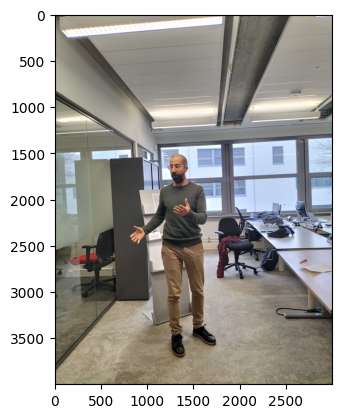

In [27]:
# To do: veel plaatjes worden gekanteld getoond terwijl de keypoints wel goed getoond worden. Uitzoeken wat hier gebeurt:
# - Zijn die plaatjes in de bron gekanteld en draait Windows ze zelf?
# - Kantelt YOLO ze ook omdat ie zo slim is?
# - Gaat alles zo goed of zorgt dit voor problemen?

image = Image.open(keypoints_train_df.iloc[row]['path']).convert('RGB')
plt.imshow(image)

#### Stap 2. Dataset normaliseren

In plaats van de keypoints te relateren aan de bounding box, gaan we de keypoints relateren aan een vast punt van het lichaam: het midden van de torso. Op deze manier geeft een coördinaat meer informatie over de locatie.

In [28]:
# Eerst wordt het torso bepaald

# Hoogste punt torso: laagste waarde van beide schouders
keypoints_train_df['torso_top'] = keypoints_train_df[['y_left_shoulder', 'y_right_shoulder']].min(axis=1)
# Laagste punt torso: hoogste waarde van beide heupen
keypoints_train_df['torso_bottom'] = keypoints_train_df[['y_left_hip', 'y_right_hip']].max(axis=1)
# Meest linkse punt torso (merk op: dit gaat dus over de rechterschouder en rechterheup!
keypoints_train_df['torso_left'] = keypoints_train_df[['x_right_shoulder', 'x_right_hip']].min(axis=1)
# Meest rechtse punt torso
keypoints_train_df['torso_right'] = keypoints_train_df[['x_left_shoulder', 'x_left_hip']].max(axis=1)

# Het middelpunt van het torso
keypoints_train_df['torso_center_x'] = keypoints_train_df[['torso_left', 'torso_right']].mean(axis=1)
keypoints_train_df['torso_center_y'] = keypoints_train_df[['torso_bottom', 'torso_top']].mean(axis=1)

# De hoogte van het torso wordt waarde 1, de schaalfactor om te rekenen wordt hier berekend
keypoints_train_df['scale_factor'] = 1 / (keypoints_train_df['torso_bottom'] - keypoints_train_df['torso_top'])

In [29]:
keypoints_train_df.head()

path     pose  pose_code  \
0  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
1  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
2  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
3  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
4  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   

   confidence    x_nose    y_nose  x_left_eye  y_left_eye  x_right_eye  \
0    0.921941  0.509755  0.304004    0.521733    0.293620     0.497498   
1    0.922079  0.469513  0.314155    0.482124    0.303960     0.463963   
2    0.926764  0.571455  0.312802    0.573897    0.304598     0.561053   
3    0.925108  0.517389  0.333199    0.526162    0.321924     0.503669   
4    0.919342  0.490436  0.380321    0.502792    0.370140     0.477945   

   y_right_eye  ...  c_right_knee  c_left_ankle  c_right_ankle  torso_top  \
0     0.294270  ...      0.998608      0.989318       0.989279   0.351809   
1     0.304375  ...      0.998586      0.989669       0.988196   0.359612   
2     0.303390  ...      0.999366      0.994589       0.995360   0.358584   
3     0.323532  ...      0.998819      0.991403       0.990388   0.350926   
4     0.371312  ...      0.999120      0.992922       0.993421   0.415471   

   torso_bottom  torso_left  torso_right  torso_center_x  torso_center_y  \
0      0.501094    0.458767     0.578848        0.518807        0.426451   
1      0.510413    0.456332     0.572663        0.514497        0.435013   
2      0.508496    0.455694     0.572722        0.514208        0.433540   
3      0.504208    0.455181     0.575691        0.515436        0.427567   
4      0.556147    0.440812     0.557897        0.499355        0.485809   

   scale_factor  
0      6.698616  
1      6.631249  
2      6.670558  
3      6.523933  
4      7.108537  

[5 rows x 62 columns]

In [30]:
# Hierna moeten alle keypoints genormaliseerd worden
# Alle coördinaten moeten rondom het center van het torso geplaatst worden en geschaald worden
# To do: het gebruik maken van een APPLY functie is netter, maar het scheelt qua tijd waarschijnlijk niet heel veel

# Loop voor alle x_coordinaten
for x in x_coordinates_cols:

    # Nieuwe keypoints berekenen en oude overschrijven
    keypoints_train_df[x] = (keypoints_train_df[x] - keypoints_train_df['torso_center_x']) * keypoints_train_df['scale_factor']

# Loop voor alle y_coordinaten
for y in y_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_train_df[y] = (keypoints_train_df[y] - keypoints_train_df['torso_center_y']) * keypoints_train_df['scale_factor']

In [31]:
keypoints_train_df.head()

path     pose  pose_code  \
0  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
1  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
2  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
3  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
4  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   

   confidence    x_nose    y_nose  x_left_eye  y_left_eye  x_right_eye  \
0    0.921941 -0.060636 -0.820229    0.019600   -0.889785    -0.142743   
1    0.922079 -0.298304 -0.801438   -0.214676   -0.869041    -0.335108   
2    0.926764  0.381869 -0.805390    0.398161   -0.860116     0.312483   
3    0.925108  0.012743 -0.615652    0.069975   -0.689205    -0.076766   
4    0.919342 -0.063397 -0.749864    0.024433   -0.822238    -0.152194   

   y_right_eye  ...  c_right_knee  c_left_ankle  c_right_ankle  torso_top  \
0    -0.885432  ...      0.998608      0.989318       0.989279   0.351809   
1    -0.866289  ...      0.998586      0.989669       0.988196   0.359612   
2    -0.868173  ...      0.999366      0.994589       0.995360   0.358584   
3    -0.678715  ...      0.998819      0.991403       0.990388   0.350926   
4    -0.813908  ...      0.999120      0.992922       0.993421   0.415471   

   torso_bottom  torso_left  torso_right  torso_center_x  torso_center_y  \
0      0.501094    0.458767     0.578848        0.518807        0.426451   
1      0.510413    0.456332     0.572663        0.514497        0.435013   
2      0.508496    0.455694     0.572722        0.514208        0.433540   
3      0.504208    0.455181     0.575691        0.515436        0.427567   
4      0.556147    0.440812     0.557897        0.499355        0.485809   

   scale_factor  
0      6.698616  
1      6.631249  
2      6.670558  
3      6.523933  
4      7.108537  

[5 rows x 62 columns]

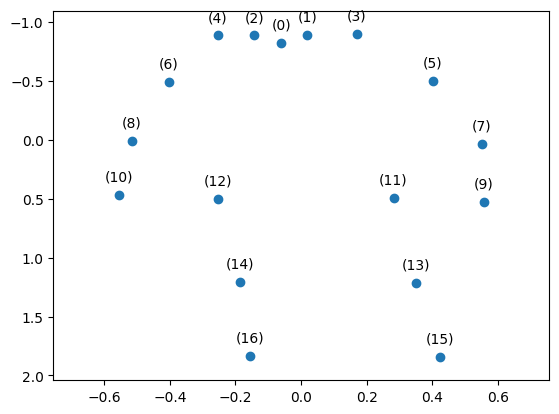

In [32]:
# Visualisatie van de keypoints
row = 0

coordinate_number = np.arange(0, 17, 1)

x_coordinates = np.zeros(17)
counter = 0
for x in x_coordinates_cols:
    x_coordinates[counter] = keypoints_train_df.iloc[row][x]
    counter += 1
x_coordinates

y_coordinates = np.zeros(17)
counter = 0
for y in y_coordinates_cols:
    y_coordinates[counter] = keypoints_train_df.iloc[row][y]
    counter += 1
y_coordinates

plt.scatter(x_coordinates, y_coordinates)
plt.xlim(keypoints_train_df.iloc[row][x_coordinates_cols].min()-0.2, keypoints_train_df.iloc[row][x_coordinates_cols].max()+0.2)
plt.ylim(keypoints_train_df.iloc[row][y_coordinates_cols].min()-0.2, keypoints_train_df.iloc[row][y_coordinates_cols].max()+0.2)
plt.gca().invert_yaxis()
plt.autoscale(False)

for x,y,z in zip(x_coordinates, y_coordinates, coordinate_number):
    label = f"({z})"
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

Hierboven is te zien dat de normalisatie correct plaats gevonden heeft:
- De heupen en schouders zijn qua x-waarde redelijk uitgelijnd over x=0
- De schouders hebben y-waarde -0.5 en de heupen +0.5

#### Stap 3. Spreiding keypoints analyseren

Hieronder worden voor alle coördinaten boxplots geplot waarbij de data gegroupeerd is per pose. Het doel is zoeken naar onderscheidende coördinaten die kunnen helpen om onderscheid te maken tussen verschillende poses.

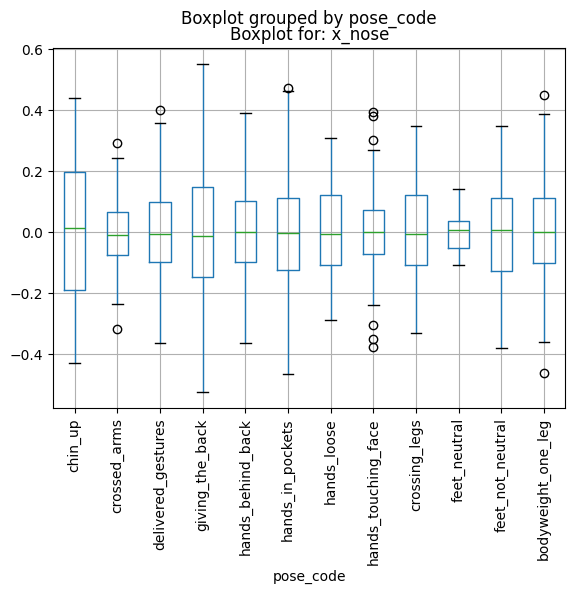

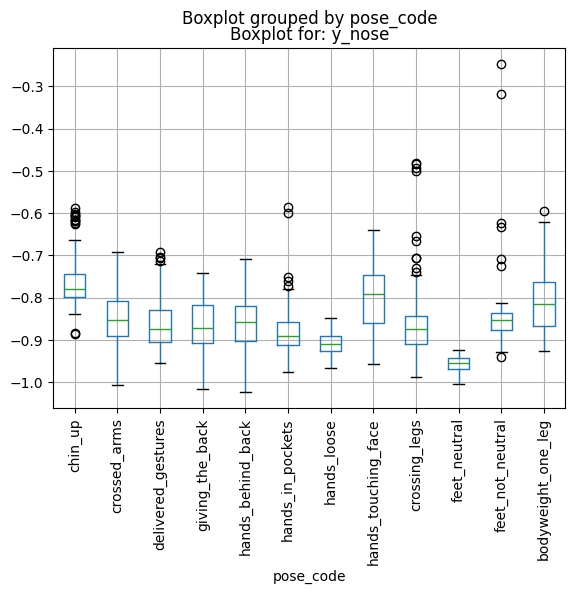

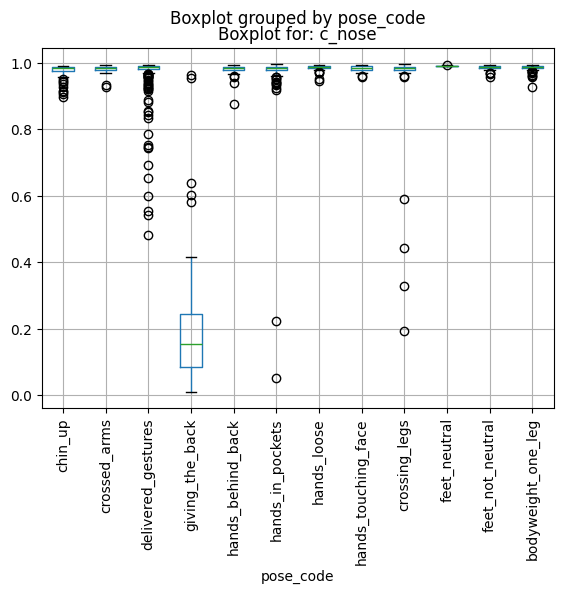

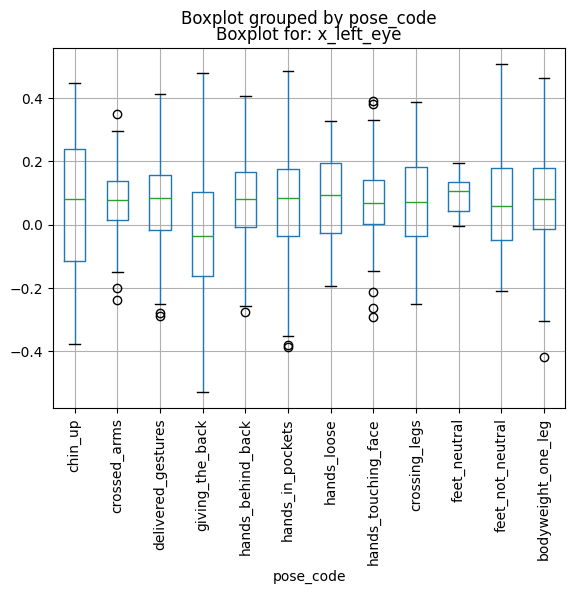

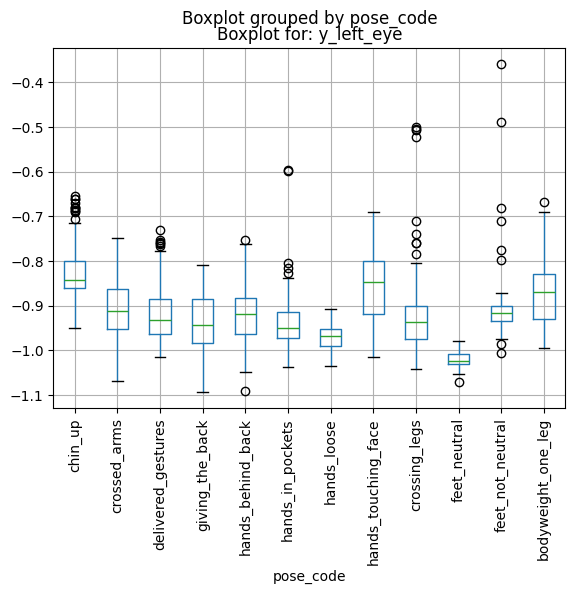

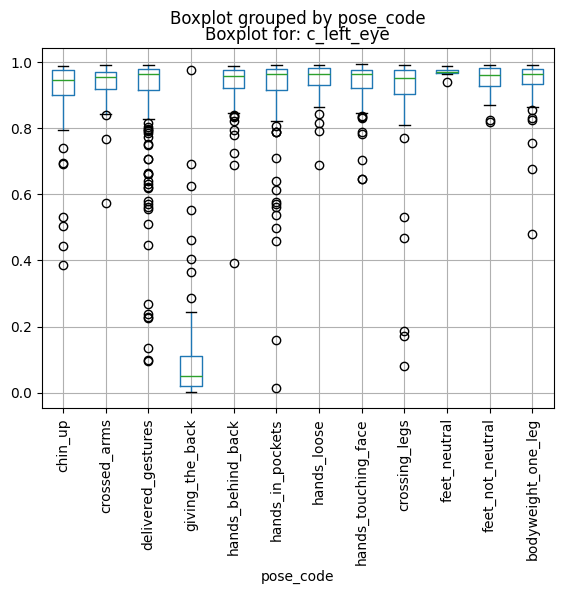

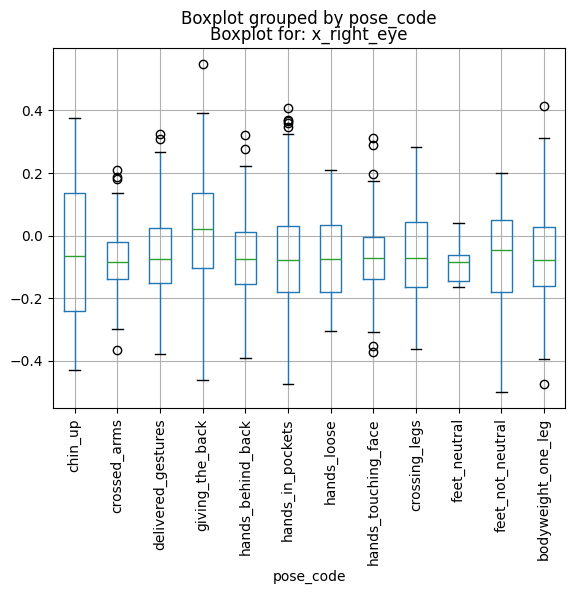

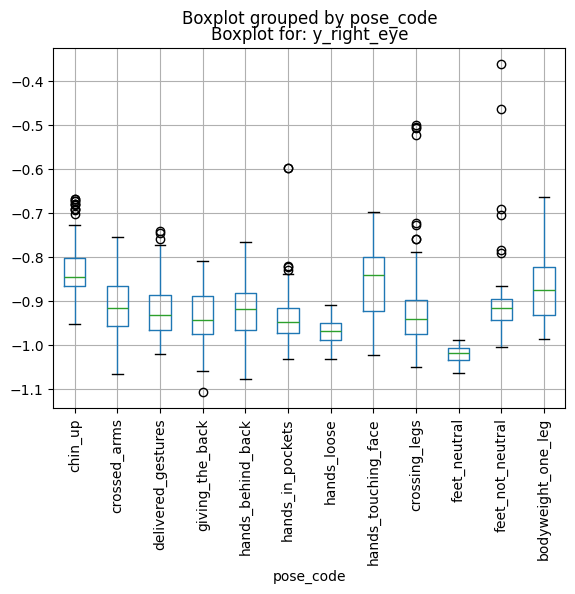

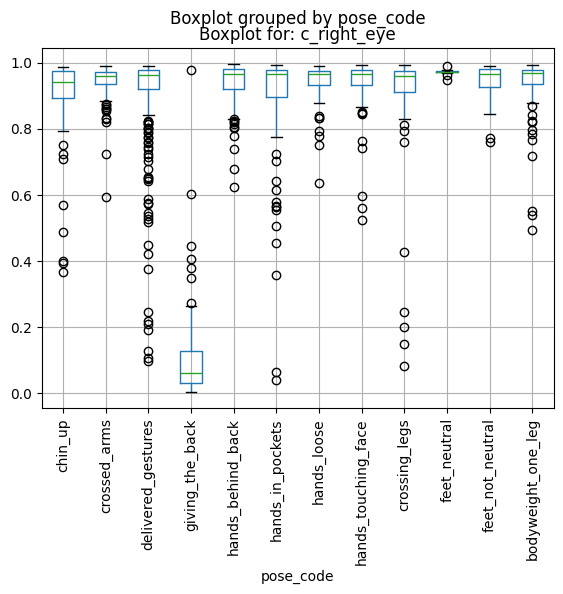

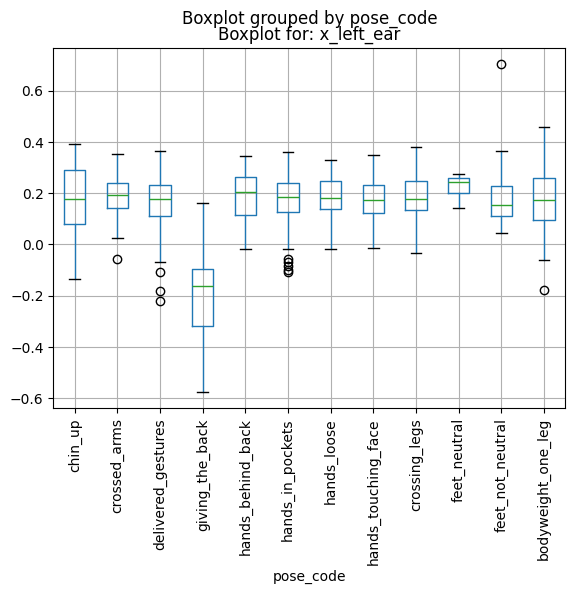

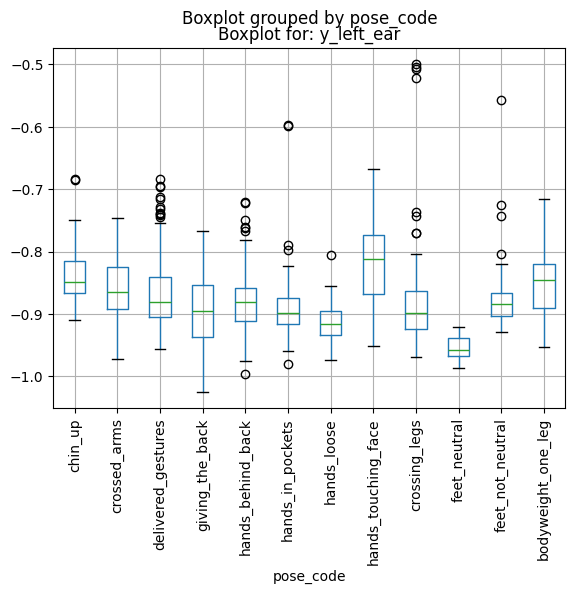

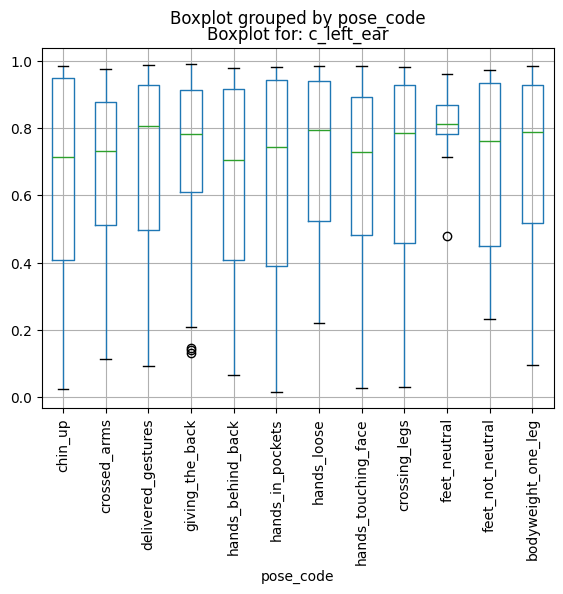

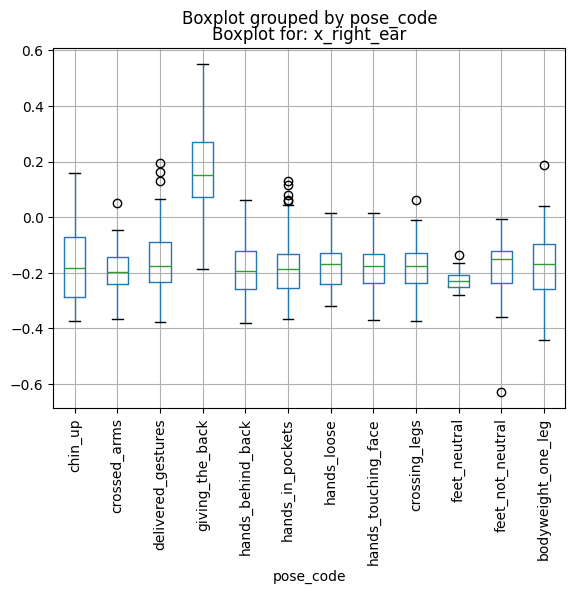

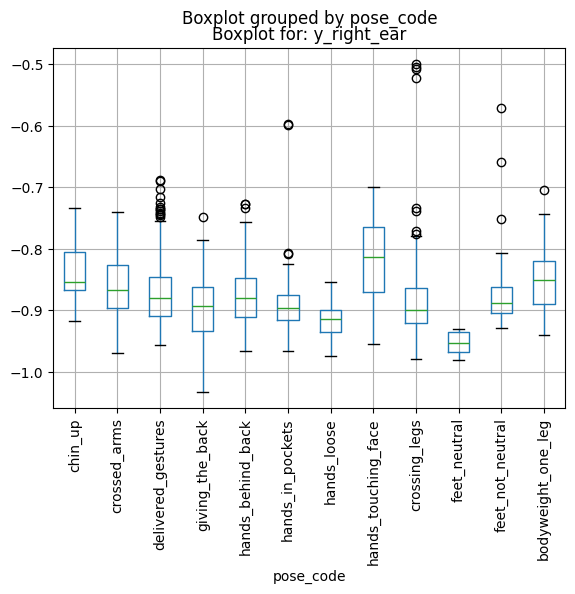

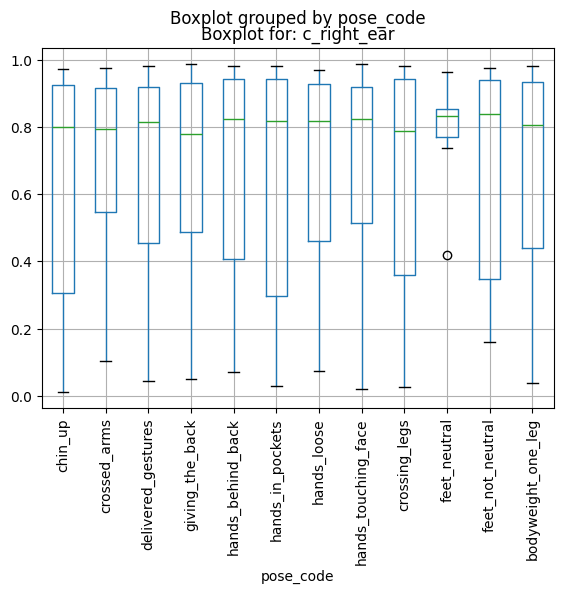

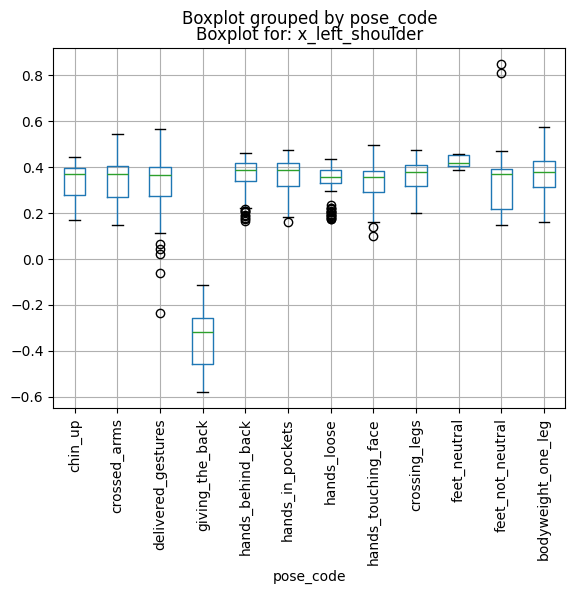

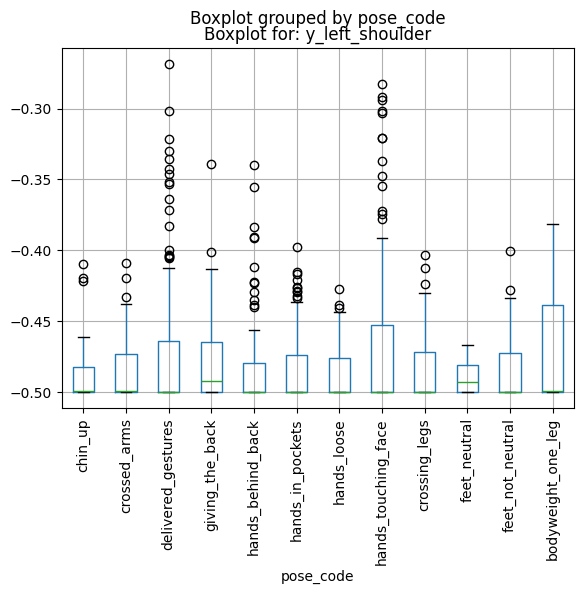

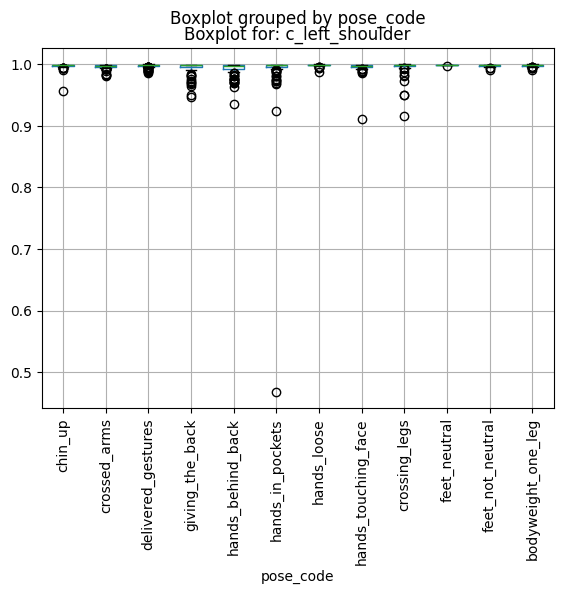

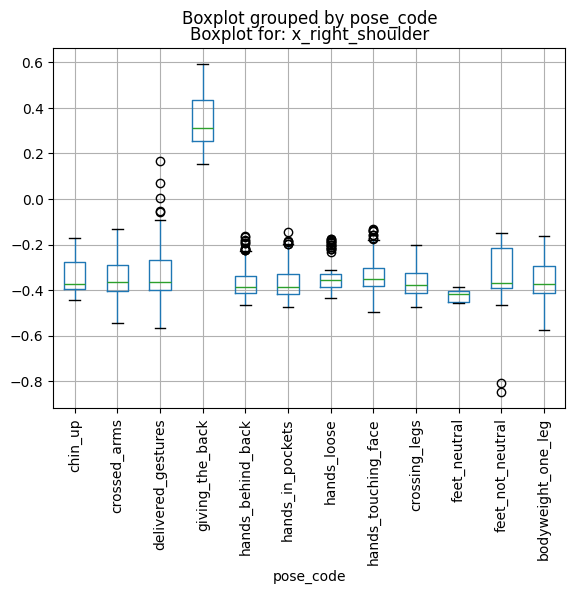

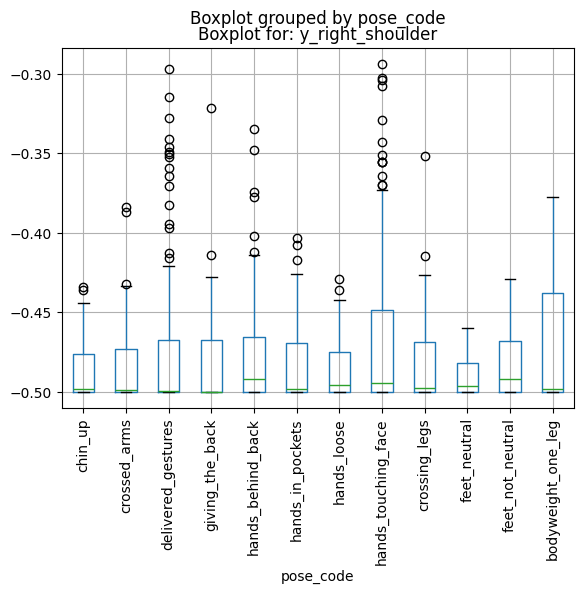

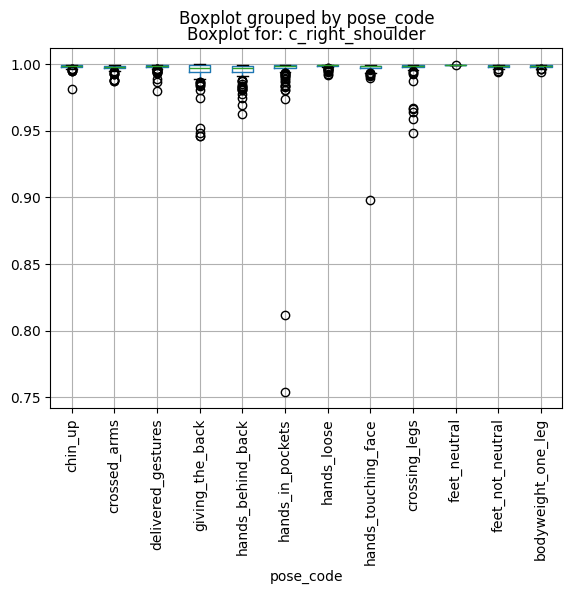

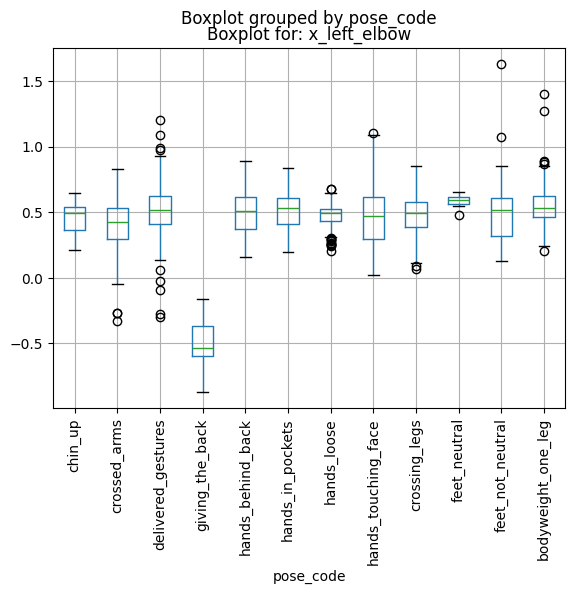

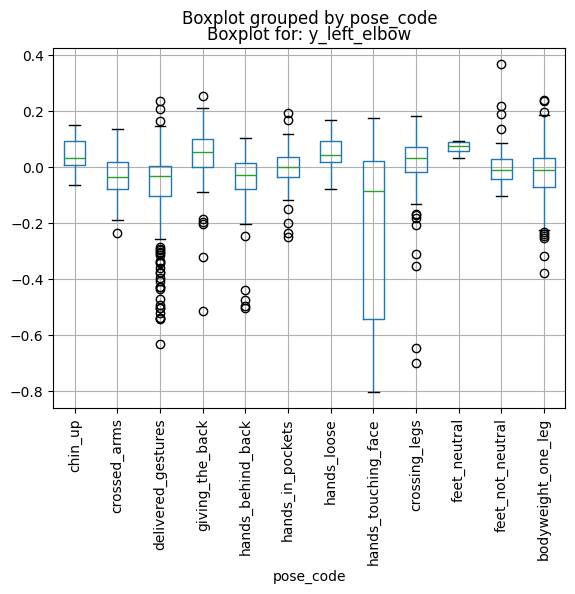

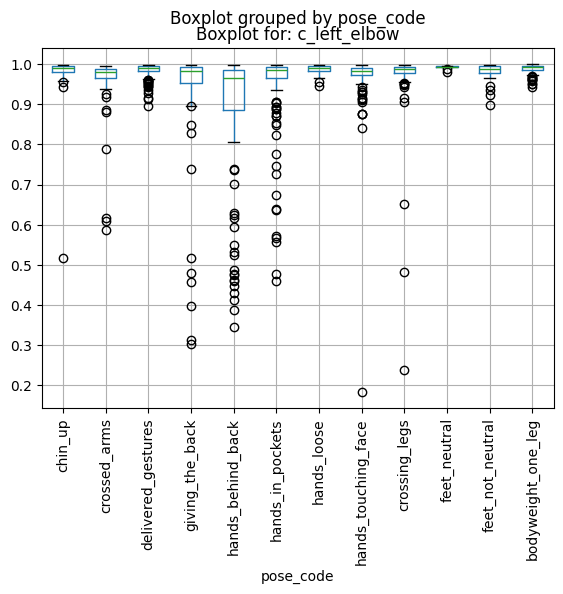

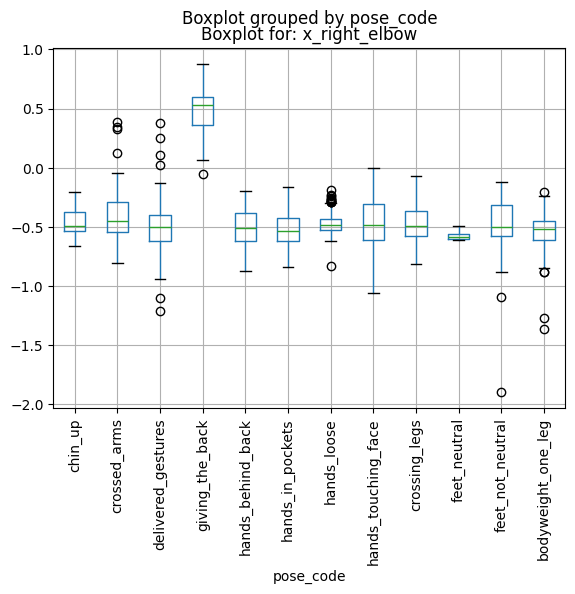

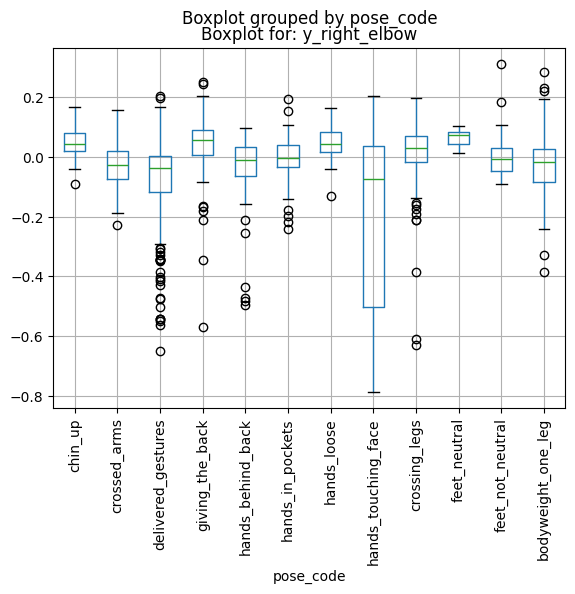

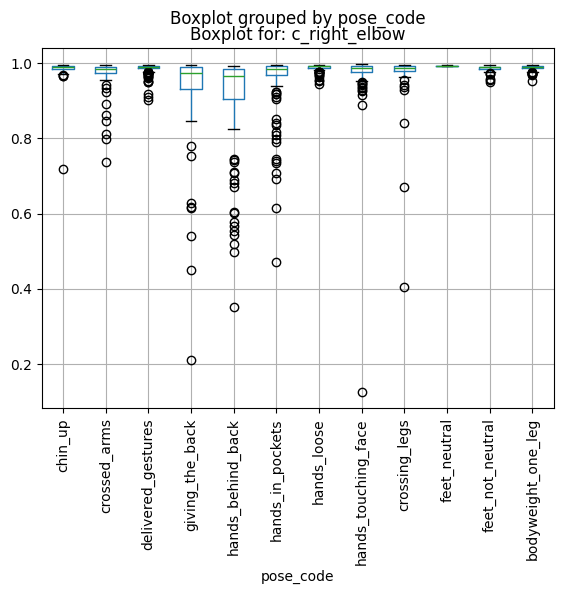

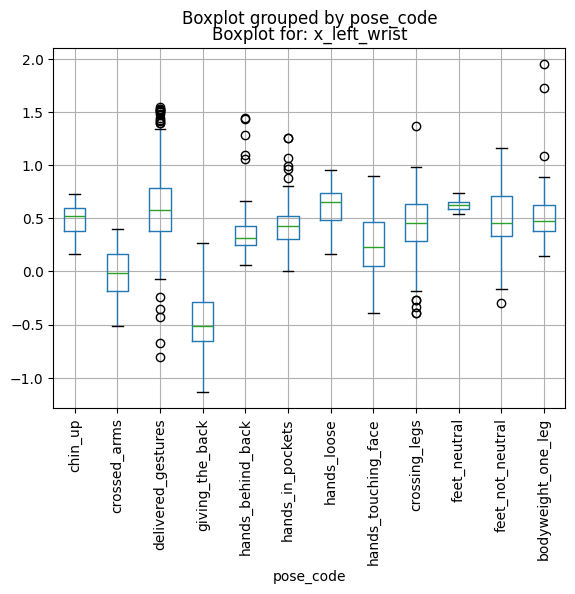

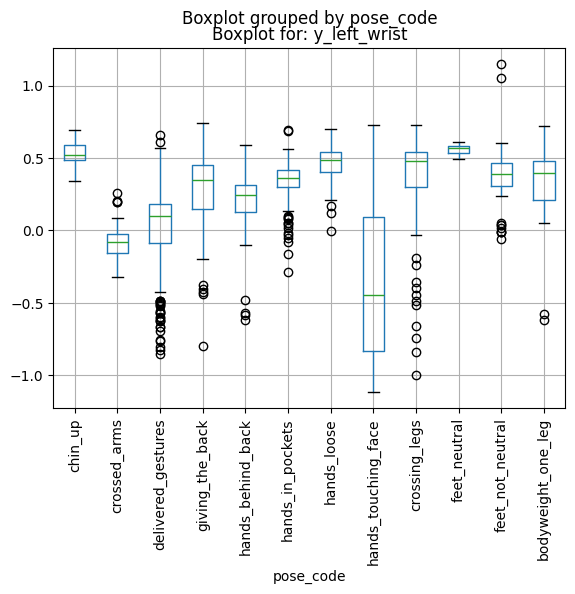

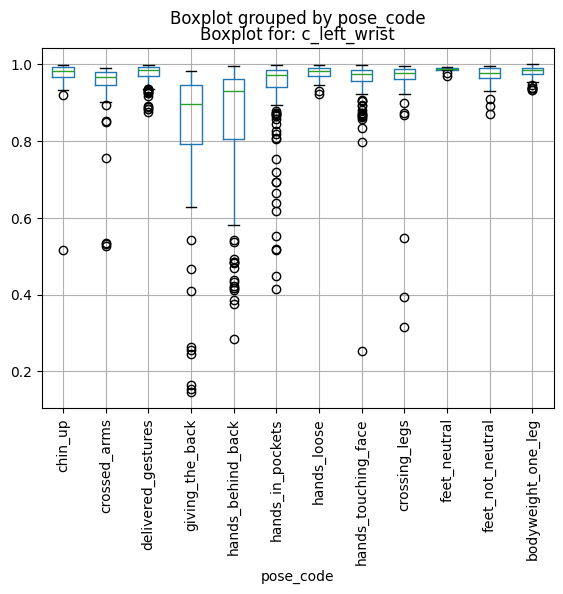

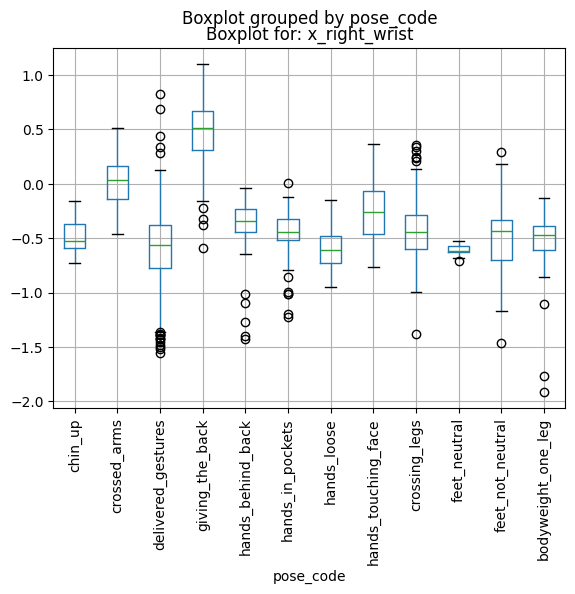

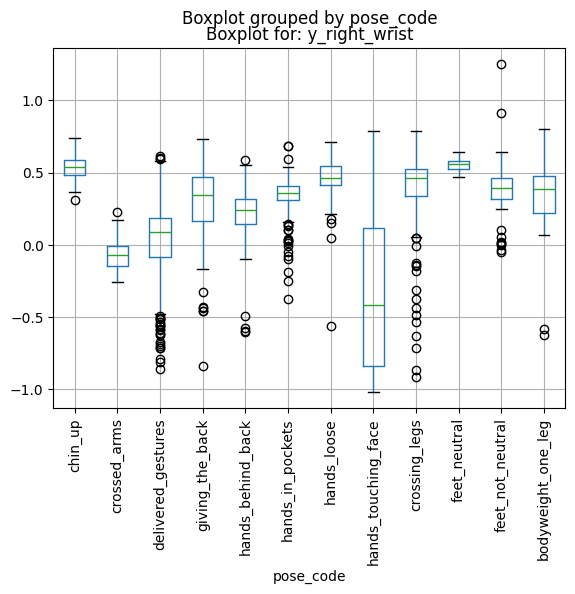

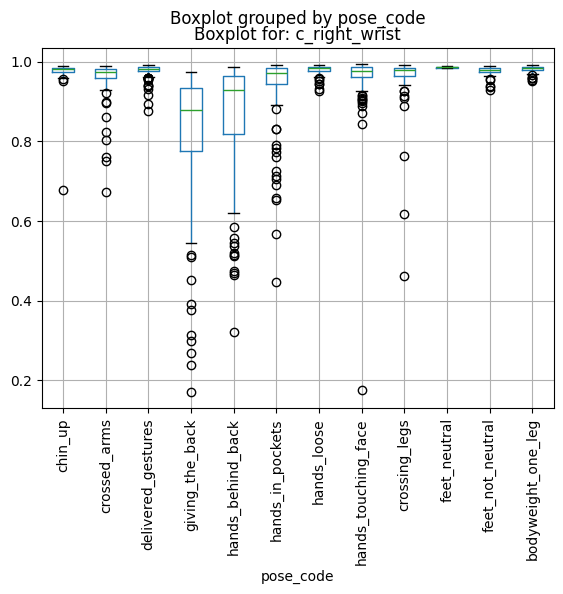

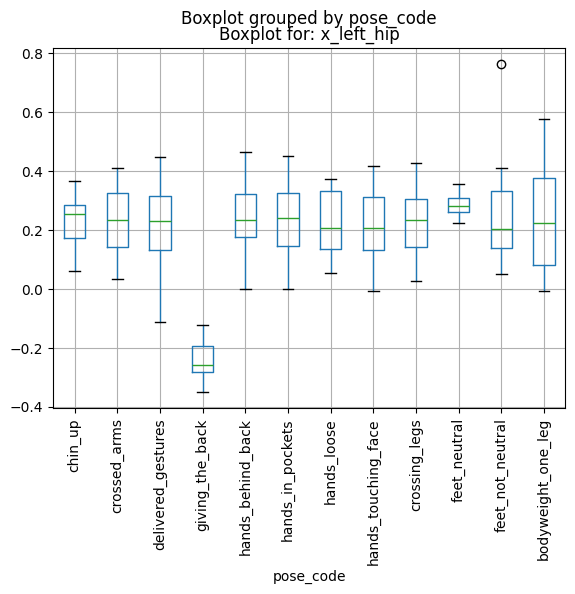

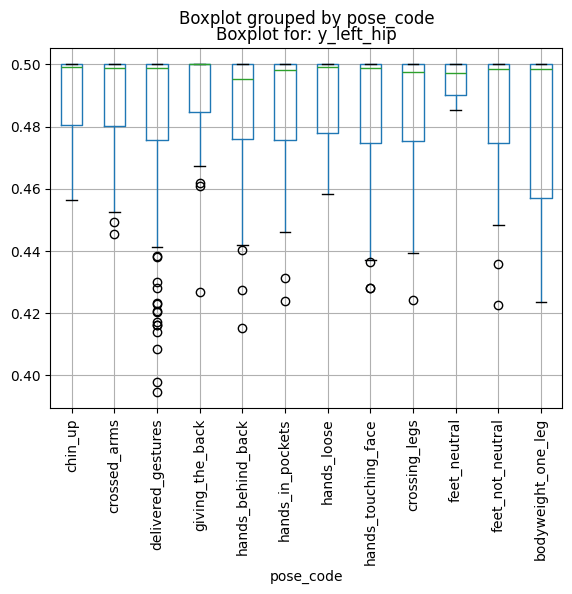

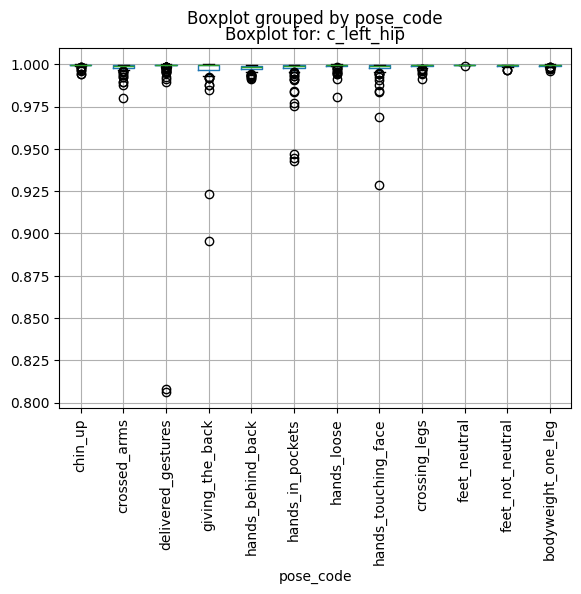

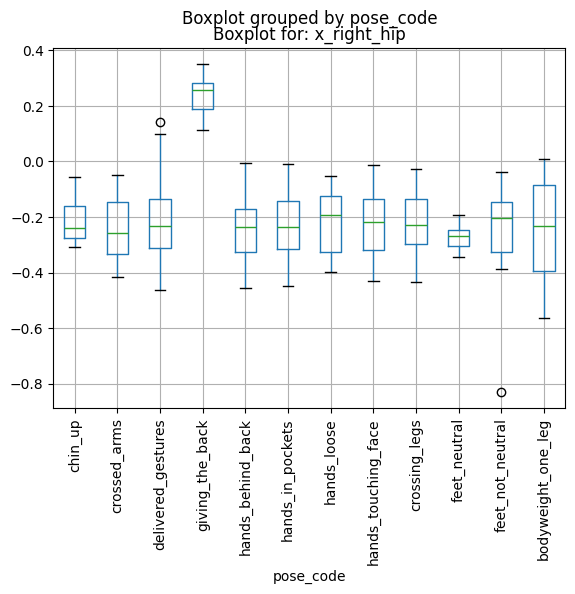

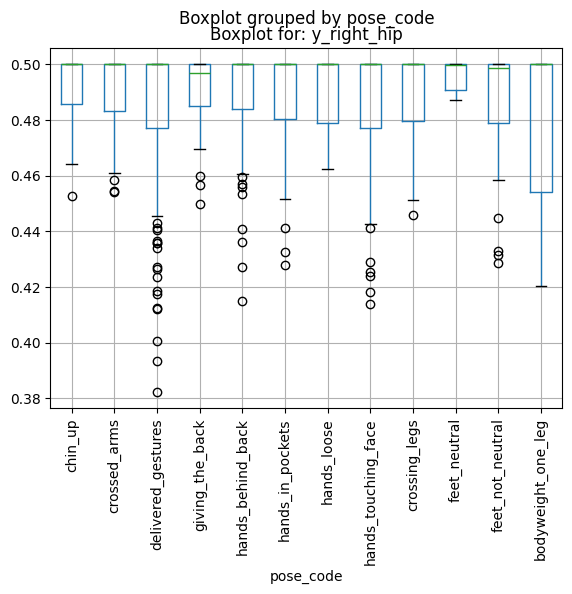

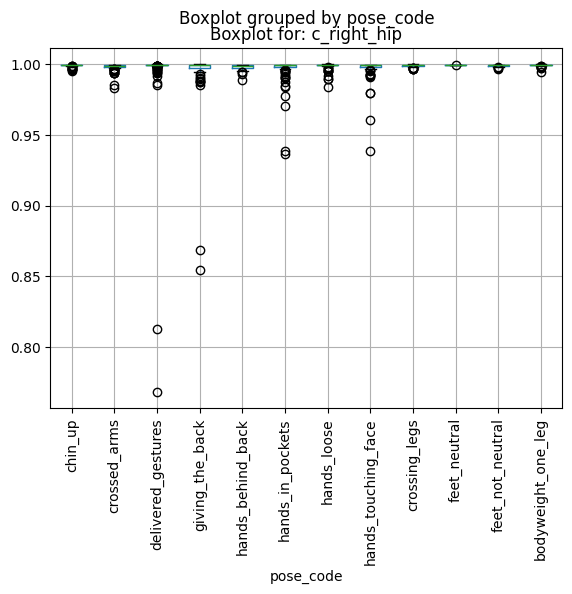

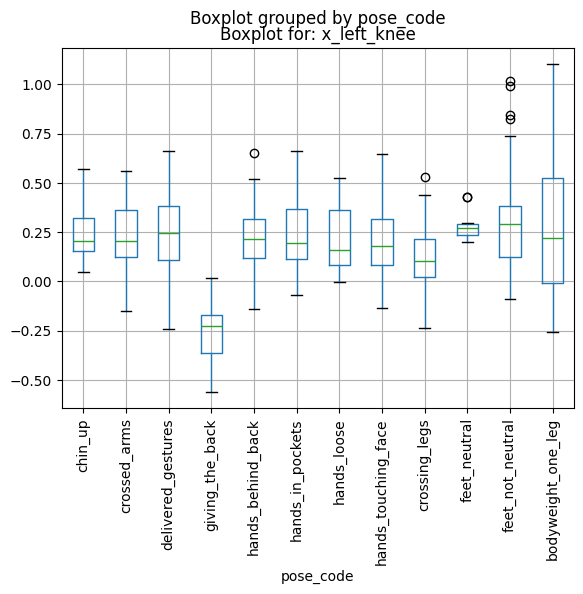

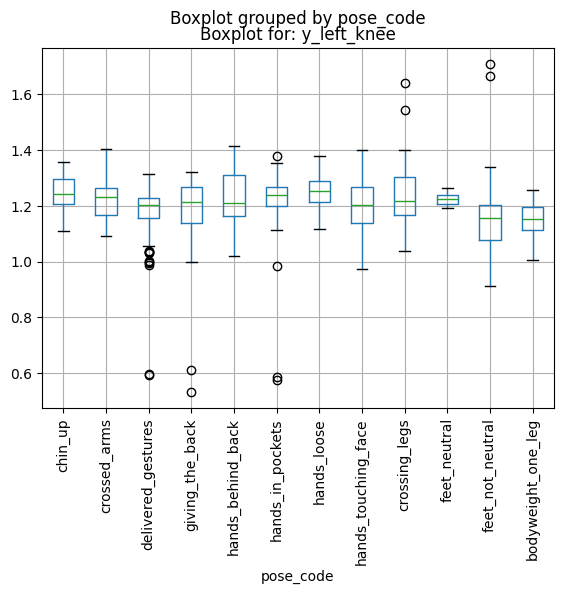

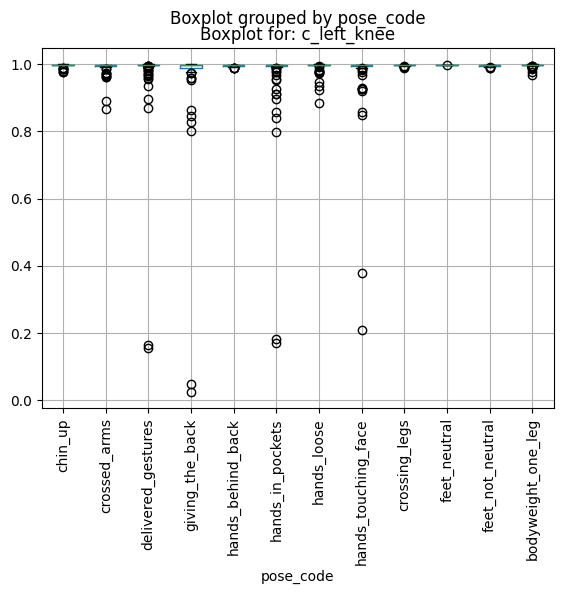

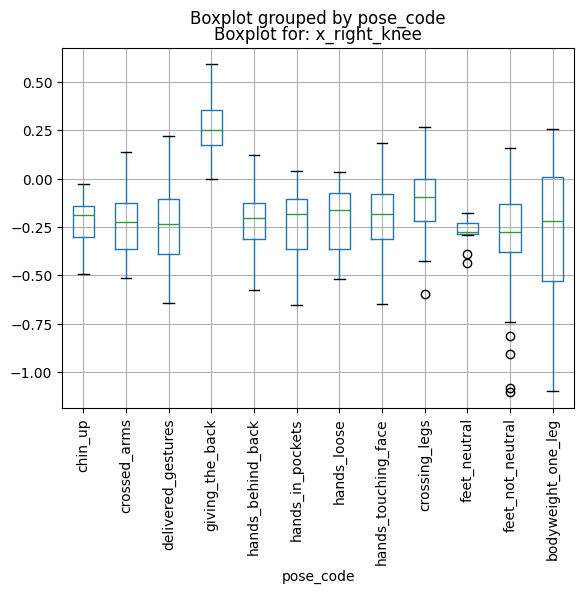

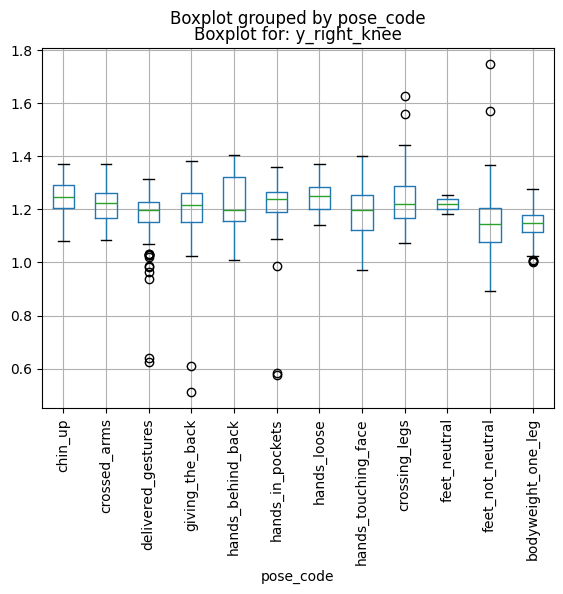

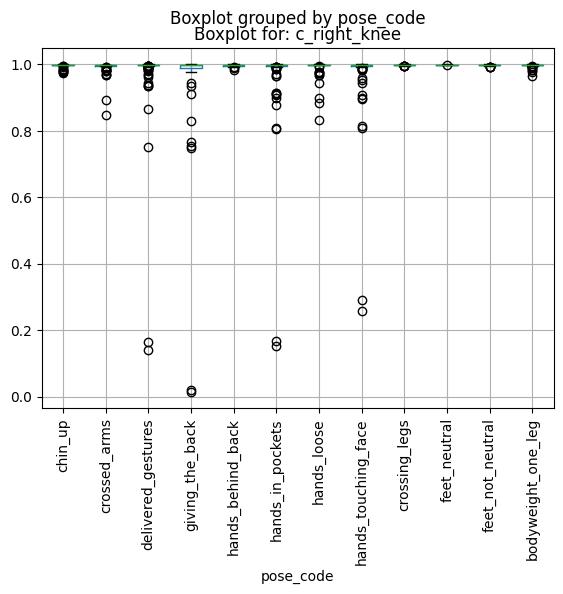

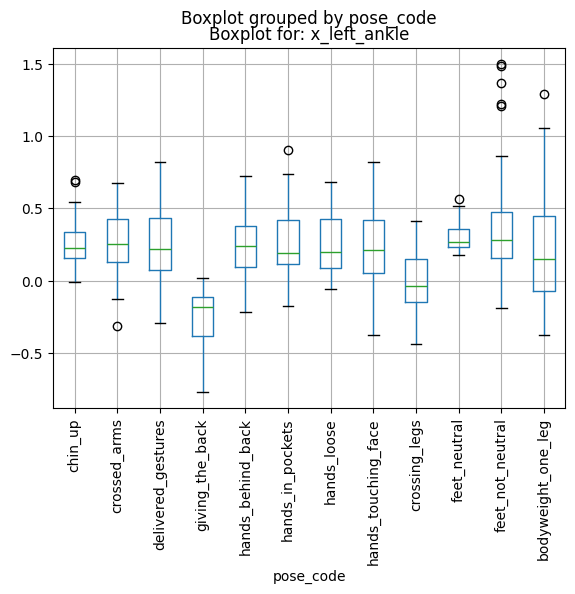

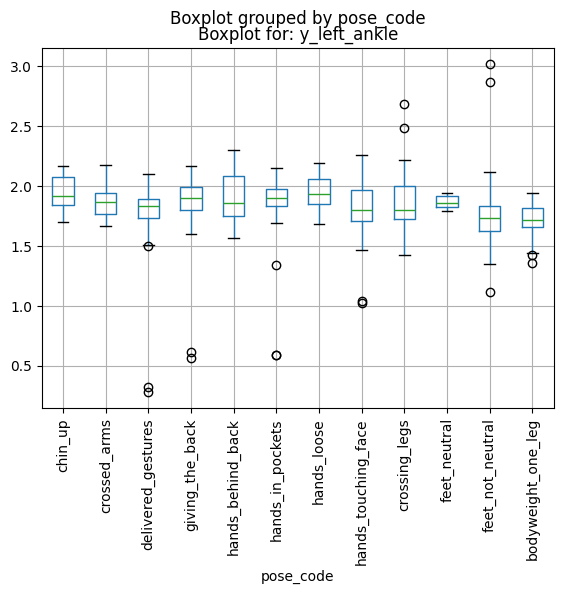

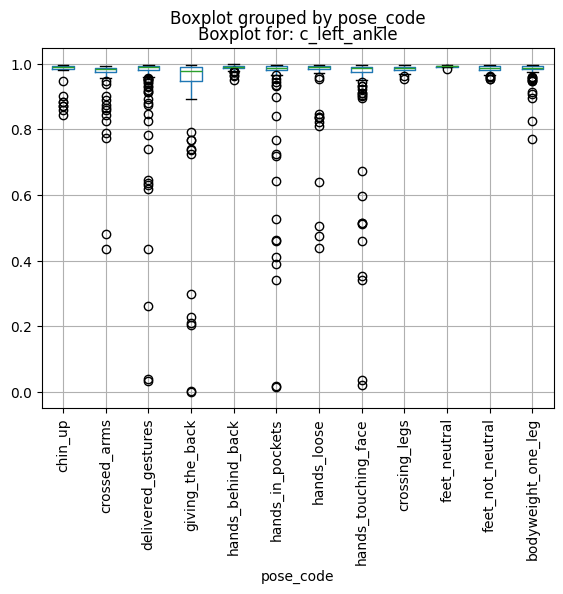

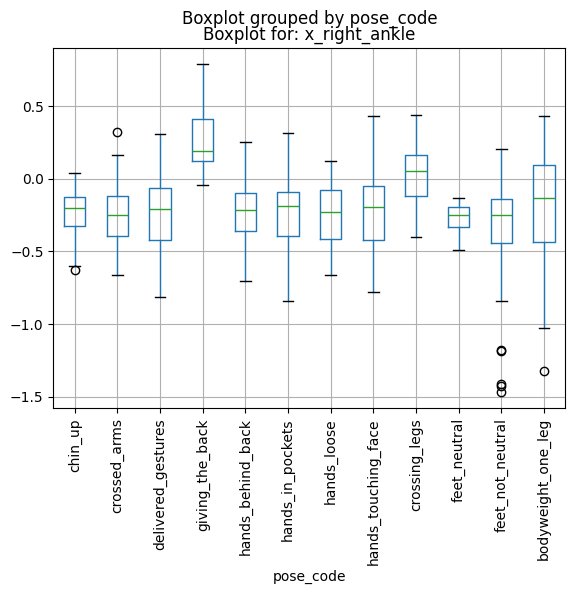

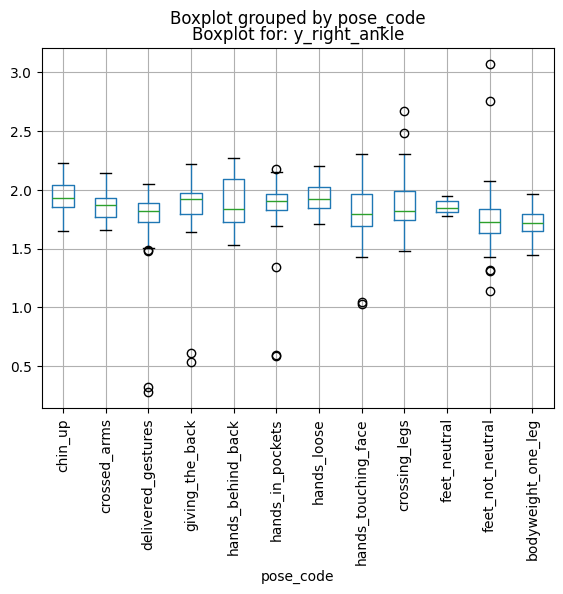

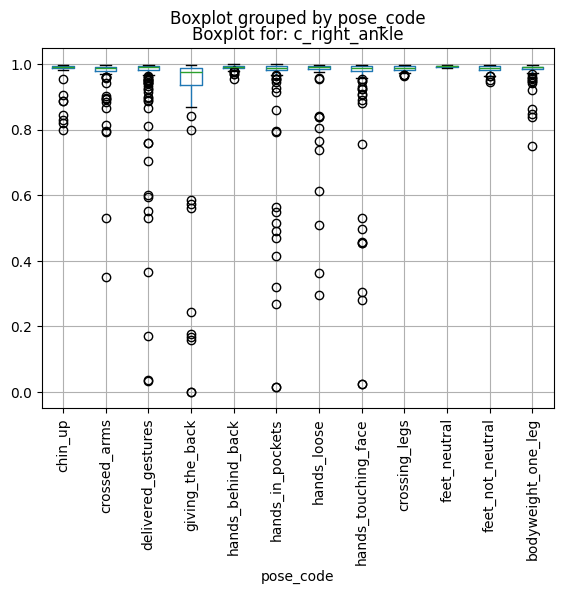

In [33]:
for i in range(0, len(x_coordinates_cols), 1):
    keypoints_train_df.boxplot(column=x_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + x_coordinates_cols[i])
    plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
    plt.show()
    keypoints_train_df.boxplot(column=y_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + y_coordinates_cols[i])
    plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
    plt.show()
    keypoints_train_df.boxplot(column=conf_coordinates_cols[i], by='pose_code')
    plt.title('Boxplot for: ' + conf_coordinates_cols[i])
    plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
    plt.show()

#### Stap 4. Dataset verrijken
Additionele data toevoegen:

- 0: 'chin_up'
  - n.v.t.
- 1: 'crossed_arms',
  - A. Horizontale afstand tussen polsen (positief of negatief) --> misschien niet eens nodig omdat bij de x_coördinaten ook al afwijkend zijn...
- 2: 'delivered_gestures',
  - B. Absolute afstand tussen polsen onderling
- 3: 'giving_the_back',
  - C. Horizontale afstand tussen heupen (positief of negatief)
- 4: 'hands_behind_back',
  - n.v.t.
- 5: 'hands_in_pockets',
  - D. en E. Absolute afstand tussen polsen en heupen
- 6: 'hands_loose',
  - n.v.t.
- 7: 'hands_touching_face',
  - F. en G. Absolute afstand tussen polsen en neus
- 8: 'crossing_legs',
  - H. Horizontale afstand tussen enkels (positief of negatief)
- 9: 'feet_neutral',
  - idem H.
- 10: 'feet_not_neutral',
  - idem H.
- 11: 'bodyweight_one_leg'
  - I. Verticale afstand tussen heupen


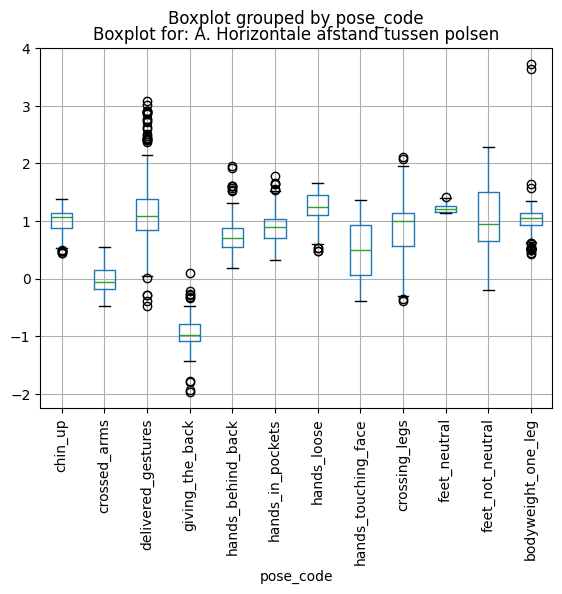

In [35]:
# A. Horizontale afstand tussen polsen (positief of negatief)
keypoints_train_df['A'] = keypoints_train_df['x_left_wrist'] - keypoints_train_df['x_right_wrist']

keypoints_train_df.boxplot('A', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: A. Horizontale afstand tussen polsen')
plt.show()

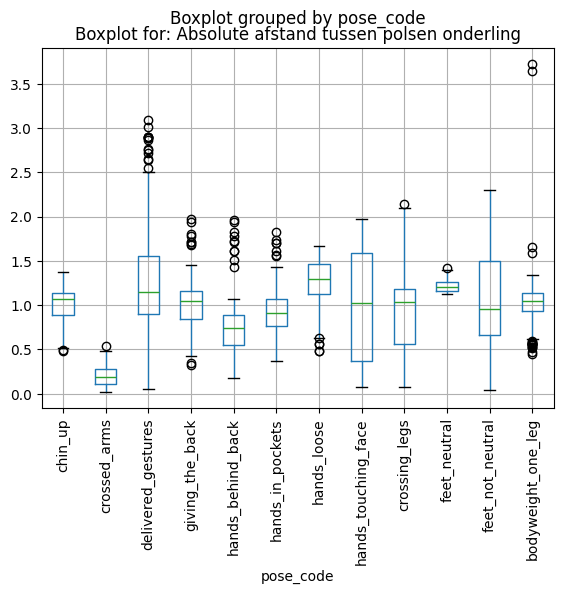

In [36]:
# B. Absolute afstand tussen polsen onderling
keypoints_train_df['B'] = np.sqrt(pow(keypoints_train_df['x_left_wrist'] - keypoints_train_df['x_right_wrist'], 2) +
                                pow(keypoints_train_df['y_left_wrist'] - keypoints_train_df['y_right_wrist'], 2))

keypoints_train_df.boxplot('B', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Absolute afstand tussen polsen onderling')
plt.show()

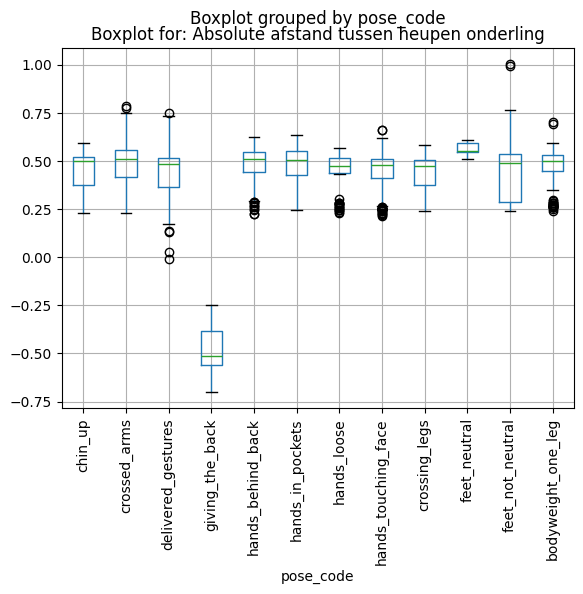

In [37]:
# C. Horizontale afstand tussen heupen (positief of negatief)
keypoints_train_df['C'] = keypoints_train_df['x_left_hip'] - keypoints_train_df['x_right_hip']

keypoints_train_df.boxplot('C', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Horizontale afstand tussen heupen (positief of negatief)')
plt.show()

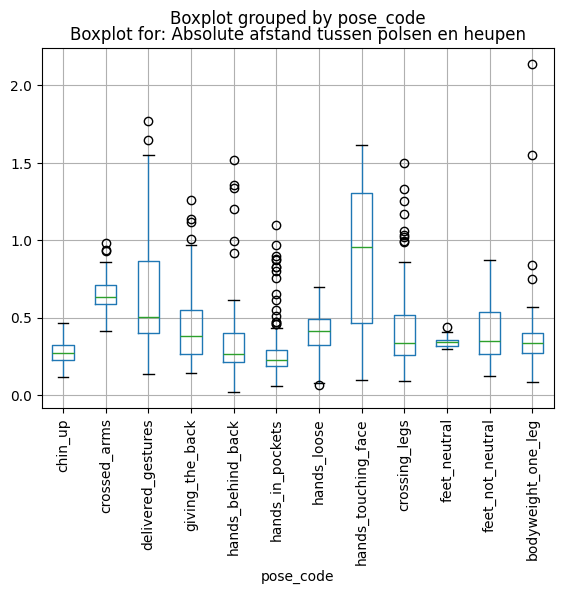

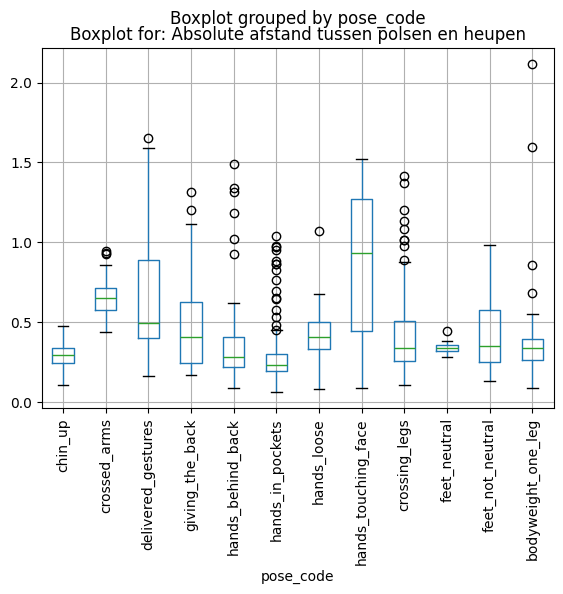

In [39]:
# D. en E. Absolute afstand tussen polsen en heupen
keypoints_train_df['D'] = np.sqrt(pow(keypoints_train_df['x_left_wrist'] - keypoints_train_df['x_left_hip'], 2) +
                                pow(keypoints_train_df['y_left_wrist'] - keypoints_train_df['y_left_hip'], 2))

keypoints_train_df.boxplot('D', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Absolute afstand tussen polsen en heupen')
plt.show()

keypoints_train_df['E'] = np.sqrt(pow(keypoints_train_df['x_right_wrist'] - keypoints_train_df['x_right_hip'], 2) +
                                pow(keypoints_train_df['y_right_wrist'] - keypoints_train_df['y_right_hip'], 2))

keypoints_train_df.boxplot('E', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Absolute afstand tussen polsen en heupen')
plt.show()

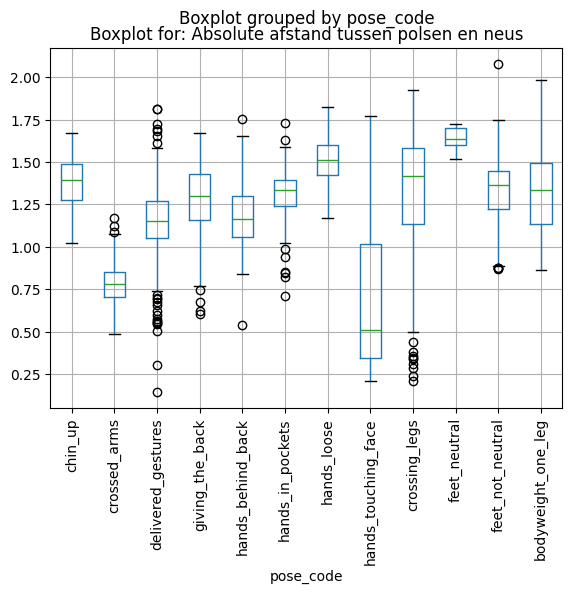

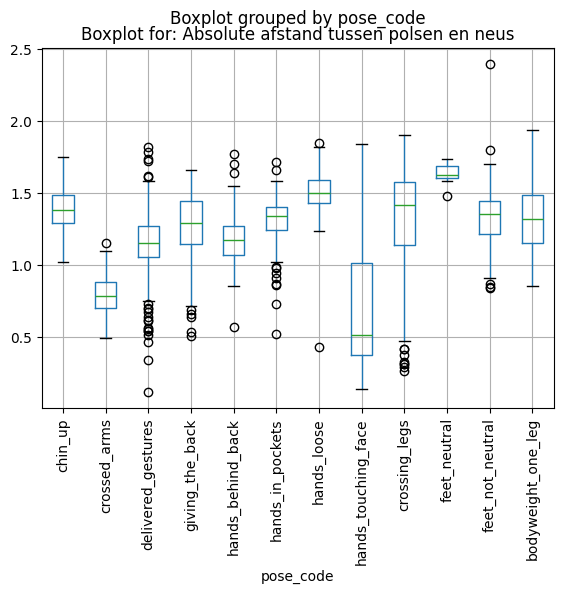

In [41]:
# F. en G. Absolute afstand tussen polsen en neus
keypoints_train_df['F'] = np.sqrt(pow(keypoints_train_df['x_left_wrist'] - keypoints_train_df['x_nose'], 2) +
                                pow(keypoints_train_df['y_left_wrist'] - keypoints_train_df['y_nose'], 2))

keypoints_train_df.boxplot('F', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Absolute afstand tussen polsen en neus')
plt.show()

keypoints_train_df['G'] = np.sqrt(pow(keypoints_train_df['x_right_wrist'] - keypoints_train_df['x_nose'], 2) +
                                pow(keypoints_train_df['y_right_wrist'] - keypoints_train_df['y_nose'], 2))

keypoints_train_df.boxplot('G', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Absolute afstand tussen polsen en neus')
plt.show()

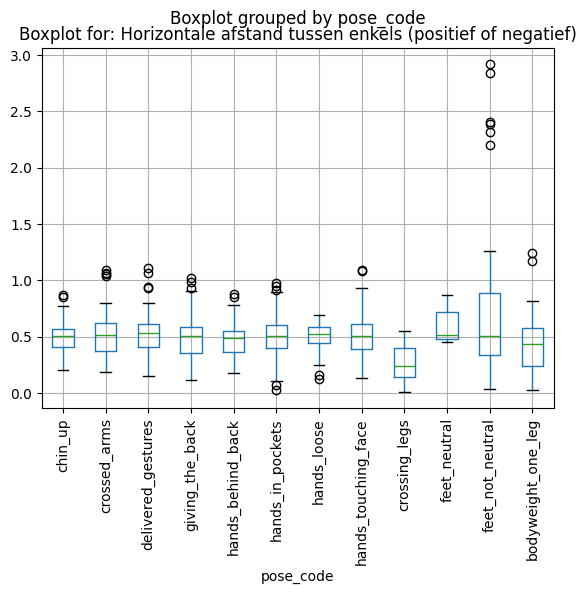

In [42]:
# H. Horizontale afstand tussen enkels (positief of negatief)
keypoints_train_df['H'] = abs(keypoints_train_df['x_left_ankle'] - keypoints_train_df['x_right_ankle'])

keypoints_train_df.boxplot('H', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Horizontale afstand tussen enkels (positief of negatief)')
plt.show()

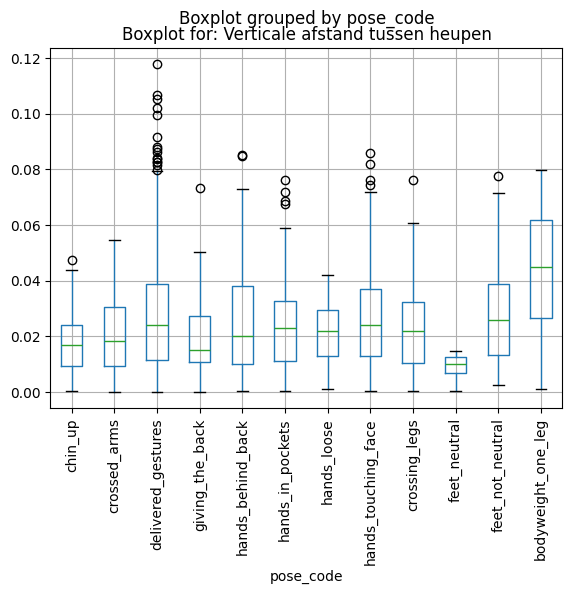

In [43]:
# I. Verticale afstand tussen heupen
keypoints_train_df['I'] = abs(keypoints_train_df['y_left_hip'] - keypoints_train_df['y_right_hip'])

keypoints_train_df.boxplot('I', by='pose_code')
plt.xticks(np.arange(1,13),poses_array, rotation='vertical')
plt.title('Boxplot for: Verticale afstand tussen heupen')
plt.show()

In [45]:
keypoints_train_df.head()

path     pose  pose_code  \
0  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
1  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
2  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
3  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
4  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   

   confidence    x_nose    y_nose  x_left_eye  y_left_eye  x_right_eye  \
0    0.921941 -0.060636 -0.820229    0.019600   -0.889785    -0.142743   
1    0.922079 -0.298304 -0.801438   -0.214676   -0.869041    -0.335108   
2    0.926764  0.381869 -0.805390    0.398161   -0.860116     0.312483   
3    0.925108  0.012743 -0.615652    0.069975   -0.689205    -0.076766   
4    0.919342 -0.063397 -0.749864    0.024433   -0.822238    -0.152194   

   y_right_eye  ...  scale_factor         A         B         C         D  \
0    -0.885432  ...      6.698616  1.112023  1.113709  0.535651  0.276718   
1    -0.866289  ...      6.631249  1.055317  1.056769  0.516058  0.270212   
2    -0.868173  ...      6.670558  1.112931  1.112932  0.512416  0.281943   
3    -0.678715  ...      6.523933  1.072322  1.072494  0.515049  0.266445   
4    -0.813908  ...      7.108537  1.365106  1.368935  0.545328  0.464428   

          E         F         G         H         I  
0  0.303405  1.481170  1.376864  0.579270  0.004591  
1  0.271870  1.559977  1.290606  0.542095  0.000638  
2  0.318607  1.319247  1.590114  0.499352  0.006372  
3  0.291626  1.240675  1.232930  0.492704  0.009406  
4  0.375341  1.490373  1.483889  0.537466  0.018202  

[5 rows x 71 columns]

### Test aanvullen
Script met dezelfde acties als hierboven, maar dan voor de testdata.

In [48]:
keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8m.csv', index_col=0)
#keypoints_test_df = pd.read_csv('analytics_df_test_YOLOv8n.csv', index_col=0)
keypoints_test_df.head()

path     pose  pose_code  \
0  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
1  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
2  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
3  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   
4  C:\Users\joost.vanstreels\PycharmProjects\YOLO...  chin_up          0   

   confidence    x_nose    y_nose  x_left_eye  y_left_eye  x_right_eye  \
0    0.918516  0.533191  0.347476    0.542597    0.337016     0.520653   
1    0.909611  0.517493  0.380646    0.527378    0.368480     0.512196   
2    0.921775  0.506313  0.334353    0.517125    0.324216     0.496876   
3    0.925312  0.498263  0.340269    0.508200    0.329623     0.490416   
4    0.918690  0.520737  0.333435    0.530824    0.323752     0.515480   

   y_right_eye  ...  c_left_elbow  c_right_elbow  c_left_wrist  c_right_wrist  \
0     0.338364  ...      0.986514       0.985340      0.978983       0.978697   
1     0.366822  ...      0.984032       0.966722      0.966248       0.942526   
2     0.325185  ...      0.994264       0.988936      0.987380       0.979686   
3     0.331269  ...      0.996387       0.987913      0.991597       0.979192   
4     0.325001  ...      0.996086       0.970869      0.991876       0.962480   

   c_left_hip  c_right_hip  c_left_knee  c_right_knee  c_left_ankle  \
0    0.998279     0.998373     0.995870      0.996177      0.980863   
1    0.998471     0.998269     0.992804      0.992318      0.960391   
2    0.999661     0.999638     0.998569      0.998576      0.990239   
3    0.999713     0.999644     0.998608      0.998391      0.989375   
4    0.999423     0.999062     0.998161      0.997146      0.988476   

   c_right_ankle  
0       0.981355  
1       0.959280  
2       0.990460  
3       0.988740  
4       0.985065  

[5 rows x 55 columns]

In [49]:
keypoints_test_df.describe()

pose_code  confidence      x_nose      y_nose  x_left_eye  y_left_eye  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean     4.645161    0.917465    0.498813    0.317111    0.508350    0.305938   
std      3.299352    0.020895    0.050608    0.082236    0.049707    0.083427   
min      0.000000    0.762654    0.358442    0.071525    0.370808    0.057365   
25%      2.000000    0.910746    0.474157    0.259065    0.486011    0.242205   
50%      5.000000    0.921473    0.501648    0.331315    0.510363    0.320726   
75%      7.000000    0.929342    0.525748    0.379764    0.533194    0.370081   
max     11.000000    0.949852    0.681243    0.549621    0.695779    0.531109   

       x_right_eye  y_right_eye  x_left_ear  y_left_ear  ...  c_left_elbow  \
count   248.000000   248.000000  248.000000  248.000000  ...    248.000000   
mean      0.486719     0.306427    0.520831    0.311541  ...      0.960459   
std       0.051132     0.083241    0.048947    0.082857  ...      0.088902   
min       0.335060     0.057642    0.321929    0.082610  ...      0.347544   
25%       0.461120     0.244478    0.497969    0.247445  ...      0.972564   
50%       0.487898     0.322664    0.522835    0.323263  ...      0.986264   
75%       0.515018     0.370180    0.547269    0.377156  ...      0.992297   
max       0.670733     0.531594    0.717113    0.544947  ...      0.999132   

       c_right_elbow  c_left_wrist  c_right_wrist  c_left_hip  c_right_hip  \
count     248.000000    248.000000     248.000000  248.000000   248.000000   
mean        0.973438      0.943144       0.958768    0.994736     0.994145   
std         0.064758      0.102746       0.075303    0.034317     0.034812   
min         0.464093      0.306116       0.467972    0.551253     0.566674   
25%         0.981199      0.952647       0.966106    0.998277     0.998688   
50%         0.989250      0.973728       0.979595    0.999284     0.999457   
75%         0.992467      0.984351       0.984875    0.999645     0.999706   
max         0.995938      0.997721       0.993337    0.999935     0.999916   

       c_left_knee  c_right_knee  c_left_ankle  c_right_ankle  
count   248.000000    248.000000    248.000000     248.000000  
mean      0.979635      0.975638      0.947093       0.940715  
std       0.111586      0.118161      0.148619       0.165956  
min       0.030477      0.030099      0.002114       0.001993  
25%       0.995859      0.997076      0.978498       0.981872  
50%       0.997896      0.998623      0.988601       0.991121  
75%       0.998949      0.999187      0.993169       0.994611  
max       0.999741      0.999763      0.997645       0.998161  

[8 rows x 53 columns]

In [51]:
keypoints_test_df['pose'].value_counts()

pose
delivered_gestures       55
crossed_arms             32
hands_in_pockets         31
hands_face               26
hands_loose              19
crossing_legs            17
bodyweight               17
chin_up                  15
feet_not_neutral         15
hands_behind_the_back    11
giving_the_back           8
feet_neutral              2
Name: count, dtype: int64

In [53]:
# Eerst wordt het torso bepaald

# Hoogste punt torso: laagste waarde van beide schouders
keypoints_test_df['torso_top'] = keypoints_test_df[['y_left_shoulder', 'y_right_shoulder']].min(axis=1)
# Laagste punt torso: hoogste waarde van beide heupen
keypoints_test_df['torso_bottom'] = keypoints_test_df[['y_left_hip', 'y_right_hip']].max(axis=1)
# Meest linkse punt torso (merk op: dit gaat dus over de rechterschouder en rechterheup!
keypoints_test_df['torso_left'] = keypoints_test_df[['x_right_shoulder', 'x_right_hip']].min(axis=1)
# Meest rechtse punt torso
keypoints_test_df['torso_right'] = keypoints_test_df[['x_left_shoulder', 'x_left_hip']].max(axis=1)

# Het middelpunt van het torso
keypoints_test_df['torso_center_x'] = keypoints_test_df[['torso_left', 'torso_right']].mean(axis=1)
keypoints_test_df['torso_center_y'] = keypoints_test_df[['torso_bottom', 'torso_top']].mean(axis=1)

# De hoogte van het torso wordt waarde 1, de schaalfactor om te rekenen wordt hier berekend
keypoints_test_df['scale_factor'] = 1 / (keypoints_test_df['torso_bottom'] - keypoints_test_df['torso_top'])

In [54]:
# Hierna moeten alle keypoints genormaliseerd worden
# Alle coördinaten moeten rondom het center van het torso geplaatst worden en geschaald worden
# To do: het gebruik maken van een APPLY functie is netter, maar het scheelt qua tijd waarschijnlijk niet heel veel

# Loop voor alle x_coordinaten
for x in x_coordinates_cols:

    # Nieuwe keypoints berekenen en oude overschrijven
    keypoints_test_df[x] = (keypoints_test_df[x] - keypoints_test_df['torso_center_x']) * keypoints_test_df['scale_factor']

# Loop voor alle y_coordinaten
for y in y_coordinates_cols:

    # Nieuwe features toevoegen en berekenen
    keypoints_test_df[y] = (keypoints_test_df[y] - keypoints_test_df['torso_center_y']) * keypoints_test_df['scale_factor']

In [55]:
keypoints_test_df['A'] = keypoints_test_df['x_left_wrist'] - keypoints_test_df['x_right_wrist']

keypoints_test_df['B'] = np.sqrt(pow(keypoints_test_df['x_left_wrist'] - keypoints_test_df['x_right_wrist'], 2) +
                                pow(keypoints_test_df['y_left_wrist'] - keypoints_test_df['y_right_wrist'], 2))

keypoints_test_df['C'] = keypoints_test_df['x_left_hip'] - keypoints_test_df['x_right_hip']

keypoints_test_df['D'] = np.sqrt(pow(keypoints_test_df['x_left_wrist'] - keypoints_test_df['x_left_hip'], 2) +
                                pow(keypoints_test_df['y_left_wrist'] - keypoints_test_df['y_left_hip'], 2))

keypoints_test_df['E'] = np.sqrt(pow(keypoints_test_df['x_right_wrist'] - keypoints_test_df['x_right_hip'], 2) +
                                pow(keypoints_test_df['y_right_wrist'] - keypoints_test_df['y_right_hip'], 2))

keypoints_test_df['F'] = np.sqrt(pow(keypoints_test_df['x_left_wrist'] - keypoints_test_df['x_nose'], 2) +
                                pow(keypoints_test_df['y_left_wrist'] - keypoints_test_df['y_nose'], 2))

keypoints_test_df['G'] = np.sqrt(pow(keypoints_test_df['x_right_wrist'] - keypoints_test_df['x_nose'], 2) +
                                pow(keypoints_test_df['y_right_wrist'] - keypoints_test_df['y_nose'], 2))

keypoints_test_df['H'] = abs(keypoints_test_df['x_left_ankle'] - keypoints_test_df['x_right_ankle'])

keypoints_test_df['I'] = abs(keypoints_test_df['y_left_hip'] - keypoints_test_df['y_right_hip'])

In [56]:
keypoints_test_df.describe()

pose_code  confidence      x_nose      y_nose  x_left_eye  y_left_eye  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean     4.645161    0.917465    0.039114   -0.845840    0.094452   -0.910281   
std      3.299352    0.020895    0.168196    0.072127    0.153468    0.072635   
min      0.000000    0.762654   -0.399669   -1.004280   -0.314896   -1.076170   
25%      2.000000    0.910746   -0.081431   -0.895297   -0.014060   -0.961069   
50%      5.000000    0.921473    0.015714   -0.860899    0.082898   -0.924247   
75%      7.000000    0.929342    0.169809   -0.811706    0.215500   -0.870448   
max     11.000000    0.949852    0.496838   -0.593351    0.495657   -0.661964   

       x_right_eye  y_right_eye  x_left_ear  y_left_ear  ...  scale_factor  \
count   248.000000   248.000000  248.000000  248.000000  ...    248.000000   
mean     -0.033805    -0.906963    0.164901   -0.878129  ...      6.044702   
std       0.159504     0.072645    0.120230    0.048759  ...      1.235897   
min      -0.400838    -1.097260   -0.386839   -0.992309  ...      2.372064   
25%      -0.149013    -0.956392    0.101403   -0.911850  ...      5.081905   
50%      -0.063716    -0.922410    0.183846   -0.884143  ...      6.172557   
75%       0.079549    -0.868238    0.237664   -0.847251  ...      7.144288   
max       0.450240    -0.634447    0.485501   -0.725654  ...      8.985560   

                A           B           C           D           E           F  \
count  248.000000  248.000000  248.000000  248.000000  248.000000  248.000000   
mean     0.771459    0.957188    0.429279    0.513342    0.493977    1.169092   
std      0.706254    0.600130    0.221491    0.334718    0.332919    0.325771   
min     -1.273934    0.044699   -0.770477    0.078838    0.069992    0.233548   
25%      0.387984    0.494121    0.296694    0.273396    0.265760    0.952812   
50%      0.834831    0.948962    0.481483    0.396531    0.394544    1.194511   
75%      1.118230    1.227019    0.545694    0.660894    0.632575    1.423070   
max      3.404607    3.405021    0.802368    1.723108    1.680712    1.891361   

                G           H           I  
count  248.000000  248.000000  248.000000  
mean     1.164749    0.513946    0.026518  
std      0.347517    0.272246    0.019525  
min      0.163597    0.001255    0.000000  
25%      0.970260    0.329025    0.012241  
50%      1.198897    0.490625    0.024160  
75%      1.395297    0.629894    0.036749  
max      2.019471    1.628626    0.111780  

[8 rows x 69 columns]

#### Stap 3. Dataset exporteren

In [57]:
#keypoints_train_df.to_csv('keypoints_train_df_YOLOv8m.csv')
#keypoints_train_df.to_csv('keypoints_train_df_YOLOv8n.csv')
keypoints_test_df.to_csv('keypoints_test_df_YOLOv8m.csv')
#keypoints_test_df.to_csv('keypoints_test_df_YOLOv8n.csv')